In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('AAPL.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-05-2017,38.345001,38.494999,38.157501,38.264999,36.224186,107843200
1,22-05-2017,38.500000,38.645000,38.227501,38.497501,36.444279,91865600
2,23-05-2017,38.724998,38.724998,38.327499,38.450001,36.399311,79675600
3,24-05-2017,38.459999,38.542500,38.167500,38.334999,36.290436,76712000
4,25-05-2017,38.432499,38.587502,38.257500,38.467499,36.415878,76942400


In [42]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,11-05-2022,153.500000,155.449997,145.809998,146.500000,146.500000,142689800
1254,12-05-2022,142.770004,146.199997,138.800003,142.559998,142.559998,182602000
1255,13-05-2022,144.589996,148.100006,143.110001,147.110001,147.110001,113787000
1256,16-05-2022,145.550003,147.520004,144.179993,145.539993,145.539993,86643800
1257,17-05-2022,148.860001,149.770004,146.679993,149.240005,149.240005,78196900


In [4]:
df1=df.reset_index()['Close']

In [5]:
df1

0        38.264999
1        38.497501
2        38.450001
3        38.334999
4        38.467499
           ...    
1253    146.500000
1254    142.559998
1255    147.110001
1256    145.539993
1257    149.240005
Name: Close, Length: 1258, dtype: float64

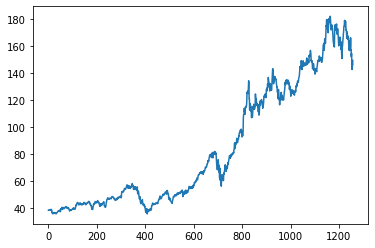

In [6]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [7]:
import numpy as np

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [9]:
print(df1)

[[0.01855422]
 [0.02014168]
 [0.01981736]
 ...
 [0.76171378]
 [0.75099426]
 [0.77625678]]


In [10]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [11]:
training_size,test_size

(817, 441)

In [12]:
train_data

array([[1.85542245e-02],
       [2.01416753e-02],
       [1.98173602e-02],
       [1.90321626e-02],
       [1.99368311e-02],
       [1.94930383e-02],
       [1.95954536e-02],
       [1.80421480e-02],
       [1.87590483e-02],
       [2.26337672e-02],
       [2.00392395e-02],
       [2.09268456e-02],
       [2.24972135e-02],
       [2.18485970e-02],
       [1.15899843e-02],
       [5.51335006e-03],
       [7.51044155e-03],
       [5.06955726e-03],
       [3.58451495e-03],
       [1.36553731e-04],
       [7.08371114e-03],
       [4.81350536e-03],
       [6.28145797e-03],
       [5.87181043e-03],
       [6.98130267e-03],
       [6.19613237e-03],
       [2.62864567e-03],
       [6.21318793e-03],
       [2.54329276e-03],
       [3.12366660e-03],
       [2.23606052e-03],
       [3.24313745e-03],
       [9.21724029e-04],
       [3.39675357e-03],
       [4.89885144e-03],
       [5.70111144e-03],
       [6.05957181e-03],
       [9.52462273e-03],
       [1.16923927e-02],
       [1.25799988e-02],


In [13]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [14]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [16]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [17]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [18]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [19]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 6s 219ms/step - loss: 0.0098 - val_loss: 0.0754
Epoch 2/100
12/12 [==============================] - 2s 145ms/step - loss: 0.0017 - val_loss: 0.0202
Epoch 3/100
12/12 [==============================] - 2s 139ms/step - loss: 8.4552e-04 - val_loss: 0.0210
Epoch 4/100
12/12 [==============================] - 2s 142ms/step - loss: 6.0611e-04 - val_loss: 0.0120
Epoch 5/100
12/12 [==============================] - 2s 145ms/step - loss: 6.0267e-04 - val_loss: 0.0170
Epoch 6/100
12/12 [==============================] - 2s 139ms/step - loss: 5.6948e-04 - val_loss: 0.0154
Epoch 7/100
12/12 [==============================] - 2s 128ms/step - loss: 5.1932e-04 - val_loss: 0.0156
Epoch 8/100
12/12 [==============================] - 2s 131ms/step - loss: 4.6587e-04 - val_loss: 0.0116
Epoch 9/100
12/12 [==============================] - 2s 137ms/step - loss: 4.4129e-04 - val_loss: 0.0161
Epoch 10/100
12/12 [==============================] - 2s 136ms/

12/12 [==============================] - 2s 170ms/step - loss: 1.8227e-04 - val_loss: 0.0035
Epoch 79/100
12/12 [==============================] - 2s 154ms/step - loss: 1.8995e-04 - val_loss: 0.0037
Epoch 80/100
12/12 [==============================] - 2s 140ms/step - loss: 1.7905e-04 - val_loss: 0.0038
Epoch 81/100
12/12 [==============================] - 2s 144ms/step - loss: 1.7624e-04 - val_loss: 0.0032
Epoch 82/100
12/12 [==============================] - 2s 146ms/step - loss: 1.7827e-04 - val_loss: 0.0019
Epoch 83/100
12/12 [==============================] - 2s 152ms/step - loss: 1.7509e-04 - val_loss: 0.0060
Epoch 84/100
12/12 [==============================] - 2s 150ms/step - loss: 1.9003e-04 - val_loss: 0.0051
Epoch 85/100
12/12 [==============================] - 2s 153ms/step - loss: 1.7906e-04 - val_loss: 0.0012
Epoch 86/100
12/12 [==============================] - 2s 145ms/step - loss: 2.5725e-04 - val_loss: 8.7244e-04
Epoch 87/100
12/12 [==============================] - 2

In [22]:
import tensorflow as tf

In [23]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 0s 24ms/step


In [24]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [25]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

57.19433663724246

In [26]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

149.82807937494147

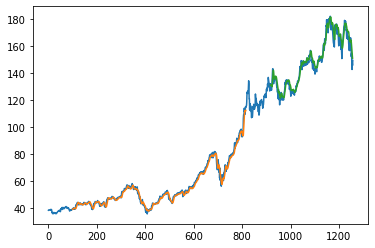

In [27]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [28]:
len(test_data)

441

In [29]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [31]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.7858528]
101
1 day input [0.98852953 0.98142868 0.98204325 0.97398653 0.96968515 1.
 0.98422806 0.95159172 0.93165489 0.93281558 0.93295217 0.95268418
 0.95575662 0.93295217 0.93896056 0.916634   0.89225911 0.88051549
 0.86617741 0.86078347 0.84822056 0.84760608 0.84439706 0.92025267
 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768 0.92933351
 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254 0.93704872
 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064 0.86843055
 0.88283697 0.88468037 0.87157123 0.89451226 0.89225911 0.87136641
 0.84494329 0.83224379 0.86986431 0.8396177  0.81374072 0.78567892
 0.81619868 0.84692327 0.85395578 0.87689682 0.88645564 0.9099429
 0.91943338 0.94578825 0.95022621 0.9562346  0.97917564 0.97105067
 0.94947516 0.94742683 0.97562521 0.9525476  0.9304942  0.93261076
 0.91861398 0.88898185 0.90202276 0.92073055 0.88584107 0.88433907
 0.90024749 0.8990868  0.89355639 0.86194416 0.86938642 0.82787408
 0.82630374 0.87457543 0.83367755 0.8357942

11 day output [[0.8474175]]
12 day input [0.95268418 0.95575662 0.93295217 0.93896056 0.916634   0.89225911
 0.88051549 0.86617741 0.86078347 0.84822056 0.84760608 0.84439706
 0.92025267 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768
 0.92933351 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254
 0.93704872 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064
 0.86843055 0.88283697 0.88468037 0.87157123 0.89451226 0.89225911
 0.87136641 0.84494329 0.83224379 0.86986431 0.8396177  0.81374072
 0.78567892 0.81619868 0.84692327 0.85395578 0.87689682 0.88645564
 0.9099429  0.91943338 0.94578825 0.95022621 0.9562346  0.97917564
 0.97105067 0.94947516 0.94742683 0.97562521 0.9525476  0.9304942
 0.93261076 0.91861398 0.88898185 0.90202276 0.92073055 0.88584107
 0.88433907 0.90024749 0.8990868  0.89355639 0.86194416 0.86938642
 0.82787408 0.82630374 0.87457543 0.83367755 0.83579422 0.84617223
 0.89082535 0.82766925 0.83115134 0.79551081 0.81223862 0.75754888
 0.73064779 0.76171378

23 day output [[0.8915544]]
24 day input [0.92025267 0.95063585 0.94947516 0.95787318 0.93779977 0.93431768
 0.92933351 0.95097726 0.96087738 0.93247418 0.90871386 0.91035254
 0.93704872 0.93541014 0.91035254 0.89956479 0.87921831 0.85020064
 0.86843055 0.88283697 0.88468037 0.87157123 0.89451226 0.89225911
 0.87136641 0.84494329 0.83224379 0.86986431 0.8396177  0.81374072
 0.78567892 0.81619868 0.84692327 0.85395578 0.87689682 0.88645564
 0.9099429  0.91943338 0.94578825 0.95022621 0.9562346  0.97917564
 0.97105067 0.94947516 0.94742683 0.97562521 0.9525476  0.9304942
 0.93261076 0.91861398 0.88898185 0.90202276 0.92073055 0.88584107
 0.88433907 0.90024749 0.8990868  0.89355639 0.86194416 0.86938642
 0.82787408 0.82630374 0.87457543 0.83367755 0.83579422 0.84617223
 0.89082535 0.82766925 0.83115134 0.79551081 0.81223862 0.75754888
 0.73064779 0.76171378 0.75099426 0.77625678 0.78585279 0.79399574
 0.80290186 0.81126249 0.81862915 0.82490832 0.83016974 0.83456838
 0.83829761 0.8415603 

In [32]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [33]:
len(df1)

1258

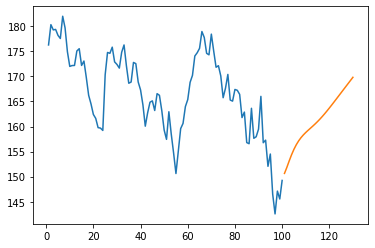

In [34]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

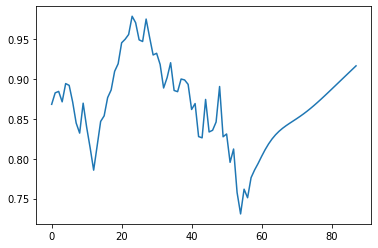

In [35]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [36]:
df3=scaler.inverse_transform(df3).tolist()

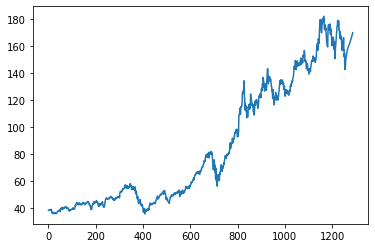

In [37]:
plt.plot(df3)

In [41]:
len(df3)-30

1258

In [40]:
df3[1258:]

[[150.64546052251362],
 [151.83809701716828],
 [153.14251044627832],
 [154.36702833460924],
 [155.4459673289244],
 [156.36563030253205],
 [157.13623117399774],
 [157.78046754013369],
 [158.32665901788567],
 [158.80452199938784],
 [159.24179993182074],
 [159.66237767090678],
 [160.0849021654117],
 [160.5228697555939],
 [160.9845650642898],
 [161.47403873954593],
 [161.9918320317478],
 [162.53591961687218],
 [163.1027659077233],
 [163.68791868338798],
 [164.2868384245038],
 [164.8952736965909],
 [165.50954923493467],
 [166.12678419070897],
 [166.74494451004563],
 [167.3627032565156],
 [167.97945807081888],
 [168.59508673512647],
 [169.20992971339058],
 [169.8244409575474]]